<a href="https://colab.research.google.com/github/TongleiChen/sketch_to_image/blob/main/COSC576_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import helper libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
from io import BytesIO # Use When expecting bytes-like objects
import pickle
from collections import OrderedDict
import os
from os import path
import ast
import random
# import matplotlib for visualization
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# import PIL for image manipulation
from PIL import Image, ImageDraw, ImageOps

# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import pytorch
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/foo.txt

Hello Google Drive!

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


In [ ]:
! mkdir -p ~/.kaggle
! cp ./drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat './drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! pip install -U kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir -p ./drive/MyDrive/kaggle/quickdraw-doodle-recognition

In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f ./train_simplified/pandas.csv -p ./drive/MyDrive/kaggle/quickdraw-doodle-recognition

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [26]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"yuni000","key":"cab374f6862b6a75afba7eecfc85931c"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions files -c quickdraw-doodle-recognition

name                                           size  creationDate         
--------------------------------------------  -----  -------------------  
train_raw/backpack.csv                        594MB  2019-12-15 23:30:21  
train_raw/baseball.csv                        412MB  2019-12-15 23:30:21  
train_raw/anvil.csv                           467MB  2019-12-15 23:30:21  
train_raw/angel.csv                           908MB  2019-12-15 23:30:21  
train_raw/bandage.csv                         571MB  2019-12-15 23:30:21  
train_raw/arm.csv                             455MB  2019-12-15 23:30:21  
train_raw/axe.csv                             392MB  2019-12-15 23:30:21  
train_raw/baseball bat.csv                    365MB  2019-12-15 23:30:21  
train_raw/apple.csv                           424MB  2019-12-15 23:30:21  
train_raw/ant.csv                             383MB  2019-12-15 23:30:21  
train_raw/asparagus.csv                       667MB  2019-12-15 23:30:21  
train_raw/The Mona Lisa.c

In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/panda.csv -p ./drive/MyDrive/kaggle/sketch

 93% 35.0M/37.5M [00:00<00:00, 129MB/s]
100% 37.5M/37.5M [00:00<00:00, 120MB/s]


In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/rabbit.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/frog.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/fish.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/lion.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/dog.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/cow.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/bear.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/giraffe.csv -p ./drive/MyDrive/kaggle/sketch
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/squirrel.csv -p ./drive/MyDrive/kaggle/sketch


rabbit.csv: Skipping, found more recently modified local copy (use --force to force download)
frog.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
fish.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
lion.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
dog.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
cow.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
bear.csv: Skipping, found more recently modified local copy (use --force to force download)
giraffe.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
squirrel.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! cd ./drive/MyDrive/kaggle/sketch
! ls
! cd sample_data
! ls

drive  sample_data
drive  sample_data


In [ ]:
! unzip ./drive/MyDrive/kaggle/sketch/giraffe.csv.zip

Archive:  ./drive/MyDrive/kaggle/sketch/giraffe.csv.zip
  inflating: giraffe.csv             


In [ ]:
! cd ./drive/MyDrive/kaggle/sketch
! pwd

/content


In [ ]:
! cd ./drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/sketch/giraffe.csv.zip -d /content/drive/MyDrive/kaggle/sketch

Archive:  ./drive/MyDrive/kaggle/sketch/giraffe.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/giraffe.csv  


In [ ]:
! unzip ./drive/MyDrive/kaggle/sketch/cow.csv.zip -d /content/drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/sketch/dog.csv.zip -d /content/drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/sketch/fish.csv.zip -d /content/drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/sketch/frog.csv.zip -d /content/drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/sketch/lion.csv.zip -d /content/drive/MyDrive/kaggle/sketch

Archive:  ./drive/MyDrive/kaggle/sketch/cow.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/cow.csv  
Archive:  ./drive/MyDrive/kaggle/sketch/dog.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/dog.csv  
Archive:  ./drive/MyDrive/kaggle/sketch/fish.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/fish.csv  
Archive:  ./drive/MyDrive/kaggle/sketch/frog.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/frog.csv  
Archive:  ./drive/MyDrive/kaggle/sketch/lion.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/lion.csv  


In [ ]:
! unzip ./drive/MyDrive/kaggle/sketch/panda.csv.zip -d /content/drive/MyDrive/kaggle/sketch

Archive:  ./drive/MyDrive/kaggle/sketch/panda.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/panda.csv  


In [29]:
categories = ["bear","camel","cat","dog","elephant","frog","lion","panda","rabbit","squirrel"]
# categories = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
label_dict = {0:'bear',1:'camel', 2:'cat', 3:'dog', 4:'elephant',
                      5:'frog',6:'lion', 7:'panda', 8:'rabbit', 9:'squirrel'}

# load data for each category
classes = {}
for category in categories:
    data = pd.read_csv("./drive/MyDrive/kaggle/sketch/" + category + ".csv")
    classes[category] = data

In [33]:
# Image manipulation utilities: 

def convert_to_PIL(drawing, width = 256, height = 256):
    """
    Function to convert from drawing to PIL image.
    INPUT:
        drawing - drawing from 'drawing' column
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        pil_img - (PIL Image) image
    """
    
    # initialize empty (white) PIL image
    pil_img = Image.new('RGB', (width, height), 'white')
    pixels = pil_img.load()
            
    draw = ImageDraw.Draw(pil_img)
    
    # draw strokes as lines
    for x,y in drawing:
        for i in range(1, len(x)):
            draw.line((x[i-1], y[i-1], x[i], y[i]), fill=0)
        
    return pil_img


def convert_to_np_raw(drawing, width = 256, height = 256):
    """
    INPUT:
        drawing - drawing in initial format
        width - width of the initial image
        height - height of the initial image
    OUTPUT:
        img - drawing converted to the numpy array (28 X 28)
    """
    # initialize empty numpy array
    img = np.zeros((28, 28))
    
    # create a PIL image out of drawing
    pil_img = convert_to_PIL(drawing)
    
    #resize to 28,28
    pil_img.thumbnail((28,28), Image.ANTIALIAS)
    
    pil_img = pil_img.convert('RGB')
    pixels = pil_img.load()

    # fill in numpy array with pixel values
    for i in range(0, 28):
        for j in range(0, 28):
            img[i, j] = 1 - pixels[j, i][0] / 255
    
    return img

def convert_to_np(pil_img, width = 256, height = 256):
    """
    Function to convert PIL Image to numpy array.
    INPUT:
        pil_img - (PIL Image) image to be converted
    OUTPUT:
        img - (numpy array) converted image with shape (width, height)
    """
    pil_img = pil_img.convert('RGB')

    img = np.zeros((width, height))
    pixels = pil_img.load()

    for i in range(0, width):
      for j in range(0, height):
            img[i, j] = 1 - pixels[j, i][0] / 255

    return img

def view_image(img, width = 256, height = 256):
    """
    Function to view numpy image with matplotlib.
    The function saves the image as png.
    INPUT:
        img - (numpy array) image from train dataset with size (1, 784)
    OUTPUT:
    None
    """
    fig, ax = plt.subplots(figsize=(6,9))
    ax.imshow(img.reshape(width, height).squeeze())
    ax.axis('off')

    plt.show()
def crop_image(image):
    """
    Crops image (crops out white spaces).
    INPUT:
        image - PIL image of original size to be cropped
    OUTPUT:
        cropped_image - PIL image cropped to the center  and resized to (28, 28)
    """
    cropped_image = image

    # get image size
    width, height = cropped_image.size

    # get image pixels
    pixels = cropped_image.load()

    image_strokes_rows = []
    image_strokes_cols = []

    # run through the image
    for i in range(0, width):
        for j in range(0, height):
            # save coordinates of the image
            if (pixels[i,j][0] > 0):
                image_strokes_cols.append(i)
                image_strokes_rows.append(j)

    # if image is not empty then crop to contents of the image
    if (len(image_strokes_rows)) > 0:
        # find the box for image
        row_min = np.array(image_strokes_rows).min()
        row_max = np.array(image_strokes_rows).max()
        col_min = np.array(image_strokes_cols).min()
        col_max = np.array(image_strokes_cols).max()

        # find the box for cropping
        margin = min(row_min, height - row_max, col_min, width - col_max)

        # crop image
        border = (col_min, row_min, width - col_max, height - row_max)
        cropped_image = ImageOps.crop(cropped_image, border)

    # get cropped image size
    width_cropped, height_cropped = cropped_image.size

    # create square resulting image to paste cropped image into the center
    dst_im = Image.new("RGBA", (max(width_cropped, height_cropped), max(width_cropped, height_cropped)), "white")
    offset = ((max(width_cropped, height_cropped) - width_cropped) // 2, (max(width_cropped, height_cropped) - height_cropped) // 2)
    # paste to the center of a resulting image
    dst_im.paste(cropped_image, offset)

    #resize to 28,28
    dst_im.thumbnail((28,28), Image.ANTIALIAS)

    return dst_im
def normalize(arr):
    """
    Function performs the linear normalizarion of the array.
    https://stackoverflow.com/questions/7422204/intensity-normalization-of-image-using-pythonpil-speed-issues
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    INPUT:
        arr - orginal numpy array
    OUTPUT:
        arr - normalized numpy array
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

def normalize_image(image):
    """
    Function performs the normalization of the image.
    https://stackoverflow.com/questions/7422204/intensity-normalization-of-image-using-pythonpil-speed-issues
    INPUT:
        image - PIL image to be normalized
    OUTPUT:
        new_img - PIL image normalized
    """
    arr = np.array(image)
    new_img = Image.fromarray(normalize(arr).astype('uint8'),'RGBA')
    return new_img

def rotate_image(src_im, angle = 45, size = (28,28)):
    """
    Function to rotate PIL Image file
    INPUT:
        src_im - (PIL Image) 28x28 image to be rotated
        angle - angle to rotate the image
        size - (tuple) size of the output image
    OUTPUT:
    dst_im - (PIL Image) rotated image
    """
    dst_im = Image.new("RGBA", size, "white")
    src_im = src_im.convert('RGBA')

    rot = src_im.rotate(angle)
    dst_im.paste(rot, (0, 0), rot)

    return dst_im
def flip_image(src_im):
    """
    Function to flip a PIL Image file.
    INPUT:
        scr_im - (PIL Image) image to be flipped
    OUTPUT:
        dst_im - (PIL Image) flipped image
    """
    dst_im = src_im.transpose(Image.FLIP_LEFT_RIGHT)
    return dst_im


In [34]:
# shrinking the images

# create the dictionary containing classes names as keys and images as values
values_dict = {}
for category in categories:
    data = classes[category][:3000]
    values = [convert_to_np_raw(ast.literal_eval(img)).reshape(1, 784) for img in data['drawing'].values]
    values_dict[category] = values
    
# concatenate to create X (values) and y (labels) datasets
X = []
y = []

for key, value in label_dict.items():
    data_i = values_dict[value]
    Xi = np.concatenate(data_i, axis = 0)
    yi = np.full((len(Xi), 1), key).ravel()
    
    X.append(Xi)
    y.append(yi)
X = np.concatenate(X, axis = 0)
y = np.concatenate(y, axis = 0)

In [35]:
def view_images_grid(X, y):
    """
    Function to plot grid with several examples of images.
    INPUT:
        X - (numpy array) images dataset
        y - (numpy array) labels for images from X dataset

    OUTPUT: None
    """
    fig, axs = plt.subplots(5, 10, figsize=(20,10))
    
    for label_num in range(0,50):
        r_label = random.randint(0, len(X) - 1)
        image = X[r_label].reshape(28,28)  #reshape images
        i = label_num // 10
        j = label_num % 10
        axs[i,j].imshow(image) #plot the data
        axs[i,j].axis('off')
        axs[i,j].set_title(label_dict[y[r_label]])
    plt.show()

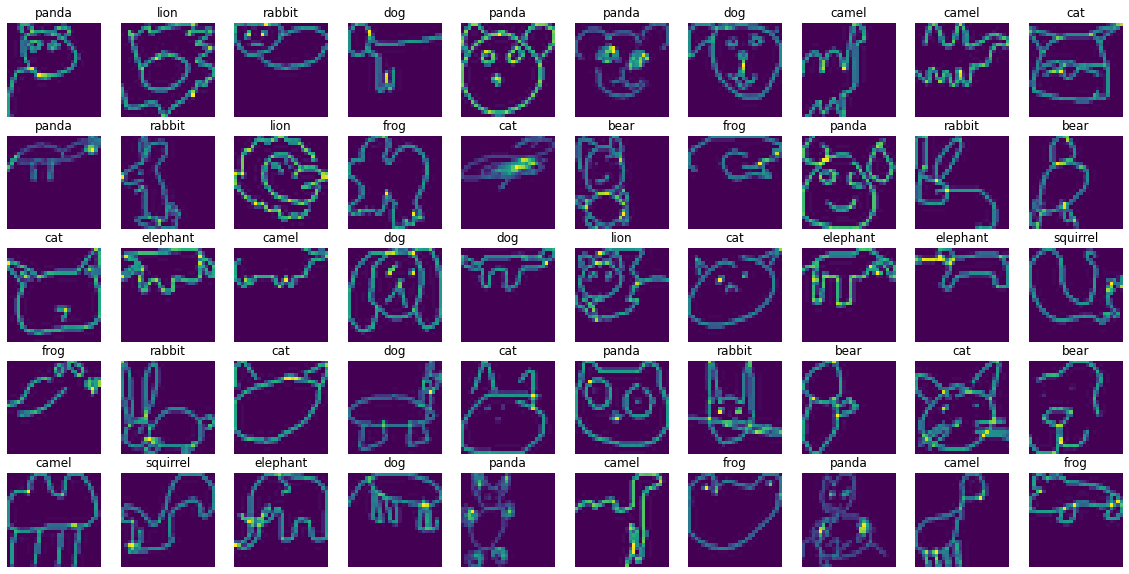

In [36]:
view_images_grid(X, y)

In [37]:
def get_label_heatmap(X, y, label, label_name):
    """
    Function to plot the heatmap for images with same label.
    INPUT:
        X - (numpy array) dataset
        y - (numpy array) labels for X dataset
        label - (int) label for images
        label_name - (str) name for images label

    OUTPUT: None
    """
    # filter X_train to remove all other images
    label_filter = y == label
    X = pd.DataFrame(X)
    X_labeled = X[label_filter]

    # find mean value for pixels
    X_mean = np.sum(X_labeled, axis = 0).values

    return X_mean

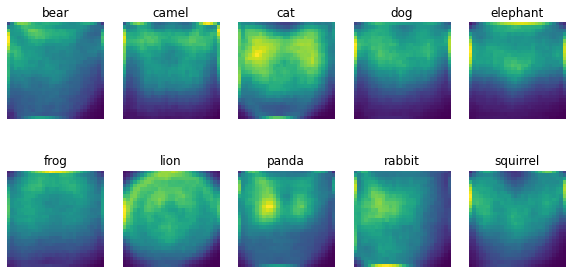

In [38]:
fig, axs = plt.subplots(2,5, figsize=(10,5))

for key, value in label_dict.items():
    # get heatmap
    heatmap = get_label_heatmap(X, y, key, value)
    
    i = key // 5
    j = key % 5
    
    # plot image
    axs[i,j].set_title(value)
    axs[i,j].imshow(heatmap.reshape(28, 28).squeeze())
    axs[i,j].axis('off')
    
plt.show()


In [39]:
def build_model(input_size, output_size, hidden_sizes, dropout = 0.0):
    '''
    Function creates deep learning model based on parameters passed.

    INPUT:
        input_size, output_size, hidden_sizes - layer sizes
        dropout - dropout (probability of keeping a node)

    OUTPUT:
        model - deep learning model
    '''

    # Build a feed-forward network
    model = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                          ('relu1', nn.ReLU()),
                          ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                          ('bn2', nn.BatchNorm1d(num_features=hidden_sizes[1])),
                          ('relu2', nn.ReLU()),
                          ('dropout', nn.Dropout(dropout)),
                          ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                          ('bn3', nn.BatchNorm1d(num_features=hidden_sizes[2])),
                          ('relu3', nn.ReLU()),
                          ('logits', nn.Linear(hidden_sizes[2], output_size))]))

    return model

def shuffle(X_train, y_train):
    """
    Function which shuffles training dataset.
    INPUT:
        X_train - (tensor) training set
        y_train - (tensor) labels for training set

    OUTPUT:
        X_train_shuffled - (tensor) shuffled training set
        y_train_shuffled - (tensor) shuffled labels for training set
        """
    X_train_shuffled = X_train.numpy()
    y_train_shuffled = y_train.numpy().reshape((X_train.shape[0], 1))

    permutation = list(np.random.permutation(X_train.shape[0]))
    X_train_shuffled = X_train_shuffled[permutation, :]
    y_train_shuffled = y_train_shuffled[permutation, :].reshape((X_train.shape[0], 1))

    X_train_shuffled = torch.from_numpy(X_train_shuffled).float()
    y_train_shuffled = torch.from_numpy(y_train_shuffled).long()

    return X_train_shuffled, y_train_shuffled

def fit_model(model, X_train, y_train, epochs = 100, n_chunks = 1000, learning_rate = 0.003, weight_decay = 0, optimizer = 'SGD'):
    """
    Function which fits the model.
    INPUT:
        model - pytorch model to fit
        X_train - (tensor) train dataset
        y_train - (tensor) train dataset labels
        epochs - number of epochs
        n_chunks - number of chunks to cplit the dataset
        learning_rate - learning rate value

    OUTPUT: None
    """

    print("Fitting model with epochs = {epochs}, learning rate = {lr}\n"\
    .format(epochs = epochs, lr = learning_rate))

    criterion = nn.CrossEntropyLoss()

    if (optimizer == 'SGD'):
      optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay= weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay= weight_decay)

    print_every = 10

    steps = 0

    for e in range(epochs):
        running_loss = 0
        X_train, y_train = shuffle(X_train, y_train)

        images = torch.chunk(X_train, n_chunks)
        labels = torch.chunk(y_train, n_chunks)

        for i in range(n_chunks):
            steps += 1

            optimizer.zero_grad()

            # Forward and backward passes
            output = model.forward(images[i])
            loss = criterion(output, labels[i].squeeze())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        if epochs % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            running_loss = 0
                
                
def view_classify(img, ps):
    """
    Function for viewing an image and it's predicted classes
    with matplotlib.

    INPUT:
        img - (tensor) image file
        ps - (tensor) predicted probabilities for each class
    """
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['panda', 'rabbit', 'frog', 'fish', 'lion', 'dog', 'cow', 'bear', 'giraffe', 'squirrel'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()


def test_model(model, img):
    """
    Function creates test view of the model's prediction for image.

    INPUT:
        model - pytorch model
        img - (tensor) image from the dataset

    OUTPUT: None
    """

    # Convert 2D image to 1D vector
    img = img.resize_(1, 784)

    ps = get_preds(model, img)
    view_classify(img.resize_(1, 28, 28), ps)


def get_preds(model, input):
    """
    Function to get predicted probabilities from the model for each class.

    INPUT:
        model - pytorch model
        input - (tensor) input vector

    OUTPUT:
        ps - (tensor) vector of predictions
    """

    # Turn off gradients to speed up this part
    with torch.no_grad():
        logits = model.forward(input)
    ps = F.softmax(logits, dim=1)
    return ps

def get_labels(pred):
    """
        Function to get the vector of predicted labels for the images in
        the dataset.

        INPUT:
            pred - (tensor) vector of predictions (probabilities for each class)
        OUTPUT:
            pred_labels - (numpy) array of predicted classes for each vector
    """

    pred_np = pred.numpy()
    pred_values = np.amax(pred_np, axis=1, keepdims=True)
    pred_labels = np.array([np.where(pred_np[i, :] == pred_values[i, :])[0] for i in range(pred_np.shape[0])])
    pred_labels = pred_labels.reshape(len(pred_np), 1)

    return pred_labels
def evaluate_model(model, train, y_train, test, y_test):
    """
    Function to print out train and test accuracy of the model.

    INPUT:
        model - pytorch model
        train - (tensor) train dataset
        y_train - (numpy) labels for train dataset
        test - (tensor) test dataset
        y_test - (numpy) labels for test dataset

    OUTPUT:
        accuracy_train - accuracy on train dataset
        accuracy_test - accuracy on test dataset
    """
    train_pred = get_preds(model, train)
    train_pred_labels = get_labels(train_pred)

    test_pred = get_preds(model, test)
    test_pred_labels = get_labels(test_pred)

    accuracy_train = accuracy_score(y_train, train_pred_labels)
    accuracy_test = accuracy_score(y_test, test_pred_labels)

    print("Accuracy score for train set is {} \n".format(accuracy_train))
    print("Accuracy score for test set is {} \n".format(accuracy_test))

    return accuracy_train, accuracy_test

def plot_learning_curve(input_size, output_size, hidden_sizes, train, labels, y_train, test, y_test, learning_rate = 0.003, weight_decay = 0.0, dropout = 0.0, n_chunks = 1000, optimizer = 'SGD'):
    """
    Function to plot learning curve depending on the number of epochs.

    INPUT:
        input_size, output_size, hidden_sizes - model parameters
        train - (tensor) train dataset
        labels - (tensor) labels for train dataset
        y_train - (numpy) labels for train dataset
        test - (tensor) test dataset
        y_test - (numpy) labels for test dataset
        learning_rate - learning rate hyperparameter
        weight_decay - weight decay (regularization)
        dropout - dropout for hidden layer
        n_chunks - the number of minibatches to train the model
        optimizer - optimizer to be used for training (SGD or Adam)

    OUTPUT: None
    """
    train_acc = []
    test_acc = []

    for epochs in np.arange(10, 60, 10):
        # create model
        model = build_model(input_size, output_size, hidden_sizes, dropout = dropout)

        # fit model
        fit_model(model, train, labels, epochs = epochs, n_chunks = n_chunks, learning_rate = learning_rate, weight_decay = weight_decay, optimizer = 'SGD')
        # get accuracy
        accuracy_train, accuracy_test = evaluate_model(model, train, y_train, test, y_test)

        train_acc.append(accuracy_train)
        test_acc.append(accuracy_test)
    
    return train_acc, test_acc

In [40]:
# Split dataset into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [41]:
# Convert to tensors
train = torch.from_numpy(X_train).float()
labels = torch.from_numpy(y_train).long()
test = torch.from_numpy(X_test).float()
test_labels = torch.from_numpy(y_test).long()

# Set hyperparameters for our network
input_size = 784
hidden_sizes = [128, 100, 64]
output_size = 10

dropout = 0.0
weight_decay = 0.0
n_chunks = 700
learning_rate = 0.03
optimizer = 'SGD'

In [42]:
# Build model
model = build_model(input_size, output_size, hidden_sizes, dropout = dropout)

# Fit model
train_acc, test_acc = plot_learning_curve(input_size, output_size, hidden_sizes, train, labels, y_train, test, y_test, learning_rate = learning_rate, dropout = dropout, weight_decay = weight_decay, n_chunks = n_chunks, optimizer = optimizer)

Fitting model with epochs = 10, learning rate = 0.03

Epoch: 1/10...  Loss: 124.0296
Epoch: 2/10...  Loss: 105.0081
Epoch: 3/10...  Loss: 96.3957
Epoch: 4/10...  Loss: 89.3552
Epoch: 5/10...  Loss: 83.4946
Epoch: 6/10...  Loss: 78.9143
Epoch: 7/10...  Loss: 74.0889
Epoch: 8/10...  Loss: 70.1581
Epoch: 9/10...  Loss: 66.0011
Epoch: 10/10...  Loss: 63.3358
Accuracy score for train set is 0.7917619047619048 

Accuracy score for test set is 0.5456666666666666 

Fitting model with epochs = 20, learning rate = 0.03

Epoch: 1/20...  Loss: 123.5107
Epoch: 2/20...  Loss: 104.4017
Epoch: 3/20...  Loss: 96.0030
Epoch: 4/20...  Loss: 89.5219
Epoch: 5/20...  Loss: 84.4897
Epoch: 6/20...  Loss: 79.4297
Epoch: 7/20...  Loss: 75.2746
Epoch: 8/20...  Loss: 71.7222
Epoch: 9/20...  Loss: 67.3230
Epoch: 10/20...  Loss: 64.1890
Epoch: 11/20...  Loss: 60.6443
Epoch: 12/20...  Loss: 56.8822
Epoch: 13/20...  Loss: 55.0814
Epoch: 14/20...  Loss: 51.8562
Epoch: 15/20...  Loss: 48.9407
Epoch: 16/20...  Loss: 46.

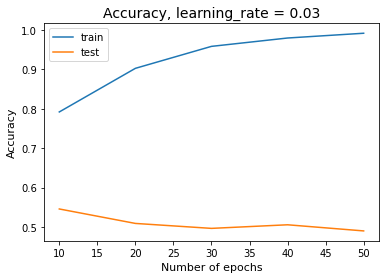

In [43]:
# Plot curve
x = np.arange(10, 10 * (len(train_acc) + 1), 10)
plt.plot(x, train_acc)
plt.plot(x, test_acc)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Accuracy, learning_rate = ' + str(learning_rate), fontsize=14)
plt.xlabel('Number of epochs', fontsize=11)
plt.ylabel('Accuracy', fontsize=11)
plt.show()

In [45]:
torch.save({
            'epoch': 50,
            'model_state_dict': model.state_dict(),
            'optimizer': optimizer,
            'train_sketch_acc': train_acc,
            'val_realworld_acc': test_acc
      
          
            }, "/content/drive/MyDrive/kaggle/sketch"+'/best_seq_model_sketch_50epoch_with_lr_003.pth')

In [ ]:
# *****************************************************
# ********************** HERE *************************
# *****************************************************
from collections import defaultdict 
features = defaultdict(list)

correct = 0
total = 0
with torch.no_grad():
    for data in quickdraw_testloader:
        data['label'] = torch.argmax(data['label'].squeeze(),dim = 1)
        images, labels = data['image'].to(device), data['label'].to(device)
        outputs = quickdraw_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        labels_sq = labels.tolist()
        for i in range(outputs.shape[0]):
              features[labels_sq[i]].append(outputs[i])

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

fea1 = torch.empty((1000,10))
for i in range(len(features)):
  fea1[i*1000:1000*(i+1)] = torch.stack(features[i])

fea2 = torch.empty((7000,7))
for i in range(len(features_real)):
  fea2[i*1000:1000*(i+1)] = torch.stack(features_real[i])


In [ ]:
! kaggle competitions download imagenet-object-localization-challenge -f ILSVRC/Data/CLS-LOC/train/n02325366/n02325366_10012.JPEG -p ./drive/MyDrive/kaggle/imagenet

  0% 0.00/59.1k [00:00<?, ?B/s]
100% 59.1k/59.1k [00:00<00:00, 952kB/s]


In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/rabbit.csv -p ./drive/MyDrive/kaggle/sketch

rabbit.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=14ddad6e2b2809e3e4d4c90a12d74775ddb061a8613a3f22f98a4df9eec449ca
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!kaggle kernels output qeeevee/imagenet-pytorch -p ./drive/MyDrive/kaggle/imagenet

Output file downloaded to ./drive/MyDrive/kaggle/imagenet/resnet34.pth
Kernel log downloaded to ./drive/MyDrive/kaggle/imagenet/imagenet-pytorch.log 


In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/camel.csv -p ./drive/MyDrive/kaggle

 26% 5.00M/19.4M [00:00<00:00, 36.1MB/s]
100% 19.4M/19.4M [00:00<00:00, 87.0MB/s]


In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/elephant.csv -p ./drive/MyDrive/kaggle

100% 26.0M/26.1M [00:00<00:00, 63.7MB/s]
100% 26.1M/26.1M [00:00<00:00, 51.6MB/s]


In [ ]:
! unzip ./drive/MyDrive/kaggle/camel.csv.zip -d /content/drive/MyDrive/kaggle/sketch
! unzip ./drive/MyDrive/kaggle/elephant.csv.zip -d /content/drive/MyDrive/kaggle/sketch


Archive:  ./drive/MyDrive/kaggle/camel.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/camel.csv  
Archive:  ./drive/MyDrive/kaggle/elephant.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/elephant.csv  


In [27]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/cat.csv -p ./drive/MyDrive/kaggle

 89% 24.0M/27.0M [00:01<00:00, 27.9MB/s]
100% 27.0M/27.0M [00:01<00:00, 18.7MB/s]


In [28]:
! unzip ./drive/MyDrive/kaggle/cat.csv.zip -d /content/drive/MyDrive/kaggle/sketch

Archive:  ./drive/MyDrive/kaggle/cat.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/cat.csv  


In [ ]:
! kaggle competitions download quickdraw-doodle-recognition -f train_simplified/car.csv -p ./drive/MyDrive/kaggle
! unzip ./drive/MyDrive/kaggle/car.csv.zip -d /content/drive/MyDrive/kaggle/sketch


 89% 30.0M/33.7M [00:00<00:00, 136MB/s] 
100% 33.7M/33.7M [00:00<00:00, 128MB/s]
Archive:  ./drive/MyDrive/kaggle/car.csv.zip
  inflating: /content/drive/MyDrive/kaggle/sketch/car.csv  


In [ ]:
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n01641577.tar -C /content/drive/MyDrive/kaggle/imagenet/frog

In [ ]:
! mkdir /content/drive/MyDrive/kaggle/imagenet/frog

In [ ]:
! mkdir /content/drive/MyDrive/kaggle/imagenet/dog
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02104029.tar -C /content/drive/MyDrive/kaggle/imagenet/dog


In [ ]:
! mkdir /content/drive/MyDrive/kaggle/imagenet/cat
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02123045.tar -C /content/drive/MyDrive/kaggle/imagenet/cat

In [ ]:
! rm -rf /content/drive/MyDrive/kaggle/imagenet/cat
! rm -rf /content/drive/MyDrive/kaggle/imagenet/lion
! rm -rf /content/drive/MyDrive/kaggle/imagenet/bear
! rm -rf /content/drive/MyDrive/kaggle/imagenet/rabbit


In [ ]:
! mkdir /content/drive/MyDrive/kaggle/imagenet/cat
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02123045.tar -C /content/drive/MyDrive/kaggle/imagenet/cat

! mkdir /content/drive/MyDrive/kaggle/imagenet/lion
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02129165.tar -C /content/drive/MyDrive/kaggle/imagenet/lion

! mkdir /content/drive/MyDrive/kaggle/imagenet/bear
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02133161.tar -C /content/drive/MyDrive/kaggle/imagenet/bear

! mkdir /content/drive/MyDrive/kaggle/imagenet/rabbit
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02325366.tar -C /content/drive/MyDrive/kaggle/imagenet/rabbit


! mkdir /content/drive/MyDrive/kaggle/imagenet/squirrel
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02356798.tar -C /content/drive/MyDrive/kaggle/imagenet/squirrel


! mkdir /content/drive/MyDrive/kaggle/imagenet/camel
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02437312.tar -C /content/drive/MyDrive/kaggle/imagenet/camel


! mkdir /content/drive/MyDrive/kaggle/imagenet/elephant
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02504013.tar -C /content/drive/MyDrive/kaggle/imagenet/elephant


! mkdir /content/drive/MyDrive/kaggle/imagenet/panda
! tar -xf /content/drive/MyDrive/kaggle/imagenet/n02510455.tar -C /content/drive/MyDrive/kaggle/imagenet/panda

In [ ]:
! rm -rf /content/n01641577*

In [ ]:
# do not run
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import os
import torch

def normalize_transform():
    return transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
  
def train_dataset(data_dir):
    train_dir = os.path.join(data_dir, 'train')
    
    train_transforms = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize_transform()
    ])
    
    train_dataset = datasets.ImageFolder(
        train_dir,
        train_transforms
    )
    
    return train_dataset
  
def val_dataset(data_dir):
    val_dir = os.path.join(data_dir, 'val')
    
    val_transforms = transforms.Compose([
        transforms.ToTensor(),
        normalize_transform()
    ])
    
    val_dataset = datasets.ImageFolder(
        val_dir,
        val_transforms
    )
    
    return val_dataset
  
def data_loader(data_dir, batch_size=256, workers=2, pin_memory=True):
    train_ds = train_dataset_imagenet(data_dir)
    val_ds = val_dataset_imagenet(data_dir)
    
    train_loader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=workers,
        pin_memory=pin_memory,
        sampler=None
    )
    
    val_loader = torch.utils.data.DataLoader(
        val_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=workers,
        pin_memory=pin_memory
    )
    
    return train_loader, val_loader

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

# from torch_snippets import *
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Sampler
from torchvision import transforms
import torch
import random
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
from PIL import Image
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
category = ["bear","camel","cat","dog","elephant","frog","lion","panda","rabbit","squirrel"]

path_ = "/content/drive/MyDrive/kaggle/imagenet/"
total_dict = {}
for c in category:
  path_to_files = path_ + c
  array_of_images = []
  num = 500
  for _, file in enumerate(os.listdir(path_to_files)):
      
      try:
          single_im = Image.open(path_to_files+"/"+file)
          single_array = np.array(single_im)
          if single_array.shape[2] != 3:
            continue
          num -= 1
          if num < 0:
            break
          array_of_images.append(single_array)
          # print(single_array)
      except:
        continue
  total_dict[c] = array_of_images


print(len(total_dict))
np.savez("/content/drive/MyDrive/kaggle/imagenet/all_images.npz",bear = total_dict['bear'],camel = total_dict['camel'],
         cat = total_dict['cat'],dog = total_dict['dog'],elephant = total_dict['elephant'],
         frog = total_dict['frog'],lion = total_dict['lion'],panda = total_dict['panda'],
         rabbit = total_dict['rabbit'],squirrel = total_dict['squirrel']
         ) # save all in one file

10


In [2]:
from PIL import Image
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
category = ["bear","camel","cat","dog","elephant","frog","lion","panda","rabbit","squirrel"]

path_ = "/content/drive/MyDrive/kaggle/imagenet/"
total_dict = {}
for c in category:
  path_to_files = path_ + c
  array_of_images = []
  num = 1
  for _, file in enumerate(os.listdir(path_to_files)):
      
      try:
          single_im = Image.open(path_to_files+"/"+file)
          single_array = np.array(single_im)
          
          if single_array.shape[2] != 3:
            print(single_array.shape[2],"###")
            continue
          print(single_array.shape[2])
          num -= 1
          if num < 0:
            break
          array_of_images.append(single_array)
          # print(single_array)
      except:
        continue
  total_dict[c] = array_of_images


np.savez("/content/drive/MyDrive/kaggle/imagenet/test_images.npz",bear = total_dict['bear'],camel = total_dict['camel'],
         cat = total_dict['cat'],dog = total_dict['dog'],elephant = total_dict['elephant'],
         frog = total_dict['frog'],lion = total_dict['lion'],panda = total_dict['panda'],
         rabbit = total_dict['rabbit'],squirrel = total_dict['squirrel']
         ) # save all in one file

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [ ]:
data_dict = dict(np.load('/content/drive/MyDrive/kaggle/imagenet/all_images.npz',allow_pickle=True))
print(data_dict['cat'])
# print(data_dict['camel'].size)
# print(data_dict['bear'].size)
# print(data_dict['dog'].size)
# print(data_dict['elephant'].size)
# print(data_dict['frog'].size)
# print(data_dict['lion'].size)
# print(data_dict['panda'].size)
# print(data_dict['rabbit'].size)
# print(data_dict['squirrel'].size)

In [3]:
from PIL import Image
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
category = ["bear","camel","cat","dog","elephant","frog","lion","panda","rabbit","squirrel"]

path_ = "/content/drive/MyDrive/kaggle/imagenet/"
total_dict = {}
for c in category:
  path_to_files = path_ + c
  array_of_images = []
  index = 0
  num = 100
  for _, file in enumerate(os.listdir(path_to_files)):
      if index < 600:
            index += 1
            continue
      try:
          single_im = Image.open(path_to_files+"/"+file)
          single_array = np.array(single_im)
          if single_array.shape[2] != 3:
            continue
          num -= 1
          if num < 0:
            break
          array_of_images.append(single_array)
      except:
        continue
  total_dict[c] = array_of_images


# print(array_of_images)
np.savez("/content/drive/MyDrive/kaggle/imagenet/test_images.npz",bear = total_dict['bear'],camel = total_dict['camel'],
         cat = total_dict['cat'],dog = total_dict['dog'],elephant = total_dict['elephant'],
         frog = total_dict['frog'],lion = total_dict['lion'],panda = total_dict['panda'],
         rabbit = total_dict['rabbit'],squirrel = total_dict['squirrel']
         ) # save all in one file

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Sampler


import random
import pandas as pd

from torchvision import transforms, utils

class ImageDataset(Dataset):

    def __init__(self, img_dir, animal_category, image_size = 255, class_size = 100,transform = False):
        """
        Args:
            sketch_dir (string): Directory to all the sketch images.
            realworld_dir (string): Directory to all the real world images.
            animal_category: list to fruit catogory
            class_size: Num of images in each category
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.img_dir = img_dir
        self.transform = transform
        self.animal_category = animal_category
        self.class_size = class_size
        self.data_dict = dict(np.load(img_dir,allow_pickle=True))
        self.image_size = image_size
       

        
        self.transform_img = transforms.Compose([transforms.ToPILImage(),
                                                transforms.Resize((image_size,image_size)),
                                                transforms.ToTensor(),])
                                              # transforms.Normalize( mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225] )
        self.transform_label = transforms.Compose([transforms.ToTensor()])
        
    def __len__(self):
        return self.class_size * len(self.animal_category)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        class_index = int(idx // self.class_size)
        category =  self.animal_category[class_index]
        category_idx = int(idx % self.class_size)
        label = np.zeros((len(self.animal_category), 1))
        label[class_index] = 1
        
#         label = class_index
        image_ary =  self.data_dict[category][category_idx]
        sample = {'image': image_ary, 'label': label}
        if self.transform:
            sample['image'] = self.transform_img(sample['image'])
            sample['label'] = self.transform_label(sample['label'])
        return sample
        
#@title 
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(2*2*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
      
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)

        out = self.fc1(out)
        out = self.fc2(out)
        return out
        if self.transform:
            sample['image'] = self.transform_img(sample['image'])
            sample['label'] = self.transform_label(sample['label'])
        return sample
  

In [6]:
num_classes = 10
num_epochs = 10
batch_size = 64
learning_rate = 0.01 #0.03

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.007, momentum = 0.9)  
RESUME =False

In [7]:

QURIES = ["bear","camel","cat","dog","elephant","frog","lion","panda","rabbit","squirrel"]  

train_realworld_dir = "/content/drive/MyDrive/kaggle/imagenet/all_images.npz"
train_realworld = ImageDataset(train_realworld_dir, QURIES, image_size = 64, class_size = 500,transform = True)
train_loader = DataLoader(train_realworld, batch_size=128, shuffle=True, pin_memory=True)

test_realworld_dir = "/content/drive/MyDrive/kaggle/imagenet/test_images.npz"
test_realworld = ImageDataset(test_realworld_dir, QURIES, image_size = 64, class_size = 10,transform = True)
test_loader_realworld = DataLoader(test_realworld, batch_size=128, shuffle=True, pin_memory=True)

In [8]:
if RESUME:
  checkpoint = torch.load(sys.path[0]+'/best_vgg16_model_realworld_10epoch_with_loss_lr_001.pth')
  model.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  start_epoch = checkpoint['epoch']
  train_realworld_acc = checkpoint['train_realworld_acc']
  train_realworld_loss = checkpoint["train_realworld_loss"]
  val_realworld_acc = checkpoint["val_realworld_acc"]
  val_realworld_loss= checkpoint["val_realworld_loss"]
  
else:
  start_epoch =0
  train_realworld_acc = []
  train_realworld_loss = []
  val_realworld_acc = []
  val_realworld_loss = []

In [9]:
import gc
total_step = len(train_loader)

for epoch in range(start_epoch,start_epoch+num_epochs):
    for data in train_loader:  
        # Move tensors to the configured device
        images = data['image'].to(device)
        labels = data['label'].to(device)
        correct_t = 0
        total_t = 0
        # Forward pass
        model.train()
        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
        _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
        total_t += labels.size(0)
        correct_t +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
    
    
    train_realworld_loss.append(loss.item())
    train_realworld_acc.append(correct_t/total_t)
    print ('Epoch [{}/{}], Training Loss: {:.4f}' 
                   .format(epoch+1,start_epoch+num_epochs, loss.item()))
            
    # Validation
    
    with torch.no_grad():
        model.eval()
        correct_v = 0
        total_v = 0
        for data in test_loader_realworld:
            images = data['image'].to(device)
            labels = data['label'].to(device)
        

            outputs = model(images)
            loss_v = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
   
            _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
            total_v += labels.size(0)
            correct_v +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
            
            del images, labels, outputs
        val_realworld_loss.append(loss_v.item())
        val_realworld_acc.append(correct_v/total_v)
        print(f"Validation accuracy: {(correct_v/total_v):.3f}")
       
print(f"train_acc:{(np.mean([v for v in train_realworld_acc])):.3f},val_acc:{(np.mean([v for v in val_realworld_acc])):.3f}")

Epoch [1/50], Training Loss: 1.5182
Validation accuracy: 0.260
Epoch [2/50], Training Loss: 1.0816
Validation accuracy: 0.390
Epoch [3/50], Training Loss: 1.7741
Validation accuracy: 0.360
Epoch [4/50], Training Loss: 1.3955
Validation accuracy: 0.260
Epoch [5/50], Training Loss: 1.4643
Validation accuracy: 0.300
Epoch [6/50], Training Loss: 2.5297
Validation accuracy: 0.230
Epoch [7/50], Training Loss: 1.8655
Validation accuracy: 0.350
Epoch [8/50], Training Loss: 2.1600
Validation accuracy: 0.300
Epoch [9/50], Training Loss: 0.6325
Validation accuracy: 0.280
Epoch [10/50], Training Loss: 1.2756
Validation accuracy: 0.410
Epoch [11/50], Training Loss: 0.9095
Validation accuracy: 0.500
Epoch [12/50], Training Loss: 0.9296
Validation accuracy: 0.500
Epoch [13/50], Training Loss: 0.5951
Validation accuracy: 0.410
Epoch [14/50], Training Loss: 2.7031
Validation accuracy: 0.320
Epoch [15/50], Training Loss: 0.8208
Validation accuracy: 0.550
Epoch [16/50], Training Loss: 1.1839
Validation a

In [10]:
test_realworld_dir = "/content/drive/MyDrive/kaggle/imagenet/test_images.npz"
test_realworld = ImageDataset(test_realworld_dir, QURIES, image_size = 64, class_size = 100,transform = True)
test_loader_realworld = DataLoader(test_realworld, batch_size=128, shuffle=True, pin_memory=True)

In [11]:
torch.save({
            'epoch': 50,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_realworld_acc': train_realworld_acc,
            'train_realworld_loss': train_realworld_loss,
            'val_realworld_acc': val_realworld_acc,
            'val_realworld_loss': val_realworld_loss,
      
          
            }, "/content/drive/MyDrive/kaggle/imagenet"+'/best_vgg16_model_realworld_50epoch_with_loss_lr_001.pth')

In [17]:
num_classes = 10
num_epochs = 10
batch_size = 128
learning_rate = 0.03 #0.03

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.007, momentum = 0.9)  
RESUME =False

In [18]:
import gc
total_step = len(train_loader)

for epoch in range(start_epoch,start_epoch+num_epochs):
    for data in train_loader:  
        # Move tensors to the configured device
        images = data['image'].to(device)
        labels = data['label'].to(device)
        correct_t = 0
        total_t = 0
        # Forward pass
        model.train()
        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
        _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
        total_t += labels.size(0)
        correct_t +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
    
    
    train_realworld_loss.append(loss.item())
    train_realworld_acc.append(correct_t/total_t)
    print ('Epoch [{}/{}], Training Loss: {:.4f}' 
                   .format(epoch+1,start_epoch+num_epochs, loss.item()))
            
    # Validation
    
    with torch.no_grad():
        model.eval()
        correct_v = 0
        total_v = 0
        for data in test_loader_realworld:
            images = data['image'].to(device)
            labels = data['label'].to(device)
        

            outputs = model(images)
            loss_v = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
   
            _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
            total_v += labels.size(0)
            correct_v +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
            
            del images, labels, outputs
        val_realworld_loss.append(loss_v.item())
        val_realworld_acc.append(correct_v/total_v)
        print(f"Validation accuracy: {(correct_v/total_v):.3f}")
       
print(f"train_acc:{(np.mean([v for v in train_realworld_acc])):.3f},val_acc:{(np.mean([v for v in val_realworld_acc])):.3f}")

Epoch [1/10], Training Loss: 1.7305
Validation accuracy: 0.175
Epoch [2/10], Training Loss: 2.6608
Validation accuracy: 0.220
Epoch [3/10], Training Loss: 1.4086
Validation accuracy: 0.221
Epoch [4/10], Training Loss: 1.4019
Validation accuracy: 0.213
Epoch [5/10], Training Loss: 1.7550
Validation accuracy: 0.264
Epoch [6/10], Training Loss: 1.8585
Validation accuracy: 0.234
Epoch [7/10], Training Loss: 1.8808
Validation accuracy: 0.214
Epoch [8/10], Training Loss: 1.2380
Validation accuracy: 0.223
Epoch [9/10], Training Loss: 1.6165
Validation accuracy: 0.302
Epoch [10/10], Training Loss: 2.5204
Validation accuracy: 0.273
train_acc:0.602,val_acc:0.417


In [23]:
num_classes = 10
num_epochs = 10
batch_size = 128
learning_rate = 0.01 #0.03

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.007, momentum = 0.9)  
RESUME =False
import gc
total_step = len(train_loader)

for epoch in range(start_epoch,start_epoch+num_epochs):
    for data in train_loader:  
        # Move tensors to the configured device
        images = data['image'].to(device)
        labels = data['label'].to(device)
        correct_t = 0
        total_t = 0
        # Forward pass
        model.train()
        outputs = model(images)
        loss = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
        _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
        total_t += labels.size(0)
        correct_t +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        del images, labels, outputs
        torch.cuda.empty_cache()
        gc.collect()
    
    
    train_realworld_loss.append(loss.item())
    train_realworld_acc.append(correct_t/total_t)
    print ('Epoch [{}/{}], Training Loss: {:.4f}' 
                   .format(epoch+1,start_epoch+num_epochs, loss.item()))
            
    # Validation
    
    with torch.no_grad():
        model.eval()
        correct_v = 0
        total_v = 0
        for data in test_loader_realworld:
            images = data['image'].to(device)
            labels = data['label'].to(device)
        

            outputs = model(images)
            loss_v = criterion(outputs, torch.argmax(labels.squeeze(),dim = 1))
   
            _, predicted = outputs.squeeze().topk(1, dim=1, largest=True, sorted=True)
        
            total_v += labels.size(0)
            correct_v +=  (predicted.squeeze() == torch.argmax(labels.squeeze(),dim = 1)).sum().item()
            
            del images, labels, outputs
        val_realworld_loss.append(loss_v.item())
        val_realworld_acc.append(correct_v/total_v)
        print(f"Validation accuracy: {(correct_v/total_v):.3f}")
       
print(f"train_acc:{(np.mean([v for v in train_realworld_acc])):.3f},val_acc:{(np.mean([v for v in val_realworld_acc])):.3f}")

Epoch [1/10], Training Loss: 1.6123
Validation accuracy: 0.147
Epoch [2/10], Training Loss: 1.5216
Validation accuracy: 0.364
Epoch [3/10], Training Loss: 1.8933
Validation accuracy: 0.290
Epoch [4/10], Training Loss: 1.3856
Validation accuracy: 0.318
Epoch [5/10], Training Loss: 1.7240
Validation accuracy: 0.367
Epoch [6/10], Training Loss: 1.8514
Validation accuracy: 0.412
Epoch [7/10], Training Loss: 1.7580
Validation accuracy: 0.377
Epoch [8/10], Training Loss: 1.1644
Validation accuracy: 0.435
Epoch [9/10], Training Loss: 1.1713
Validation accuracy: 0.416
Epoch [10/10], Training Loss: 1.9587
Validation accuracy: 0.392
train_acc:0.535,val_acc:0.380
